# MAT281 - Laboratorio N°05



## Problema 01

<img src="http://nelsoncos.com/wp-content/uploads/2017/02/sales-icon.png" width="360" height="360" align="center"/>


EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","company_sales_data.csv"))
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

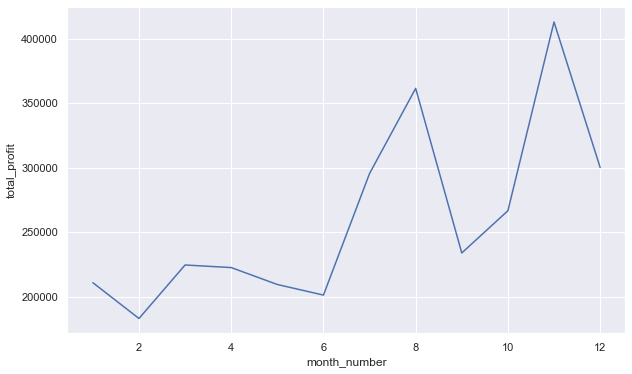

In [3]:
plt.figure(figsize=(10,6))
sns.lineplot(
x='month_number',
y='total_profit',
data=df,
ci= None)
plt.show()

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

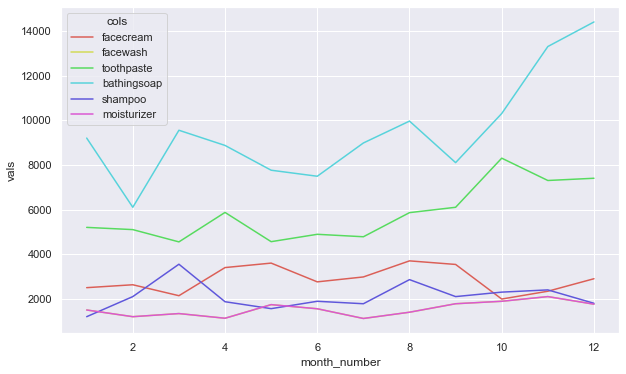

In [4]:
ndf = df[['month_number','facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']]
ndf = ndf.melt('month_number', var_name='cols',  value_name='vals')

plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 6)

sns.lineplot(
    x='month_number',
    y='vals',
    hue='cols',
    data=ndf,
    ci = None,
    palette=palette
)   
plt.show()

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

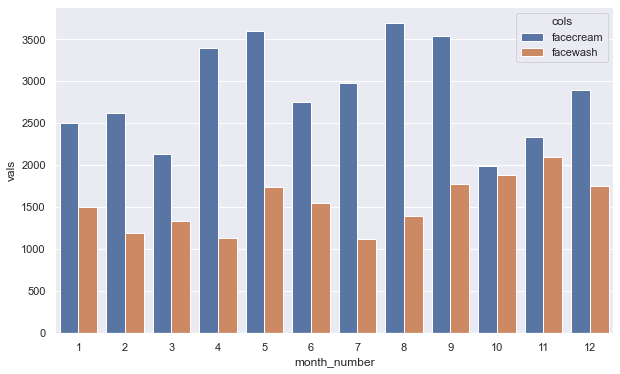

In [5]:
#asumiendo que se comparan los datos por mes
mask = (ndf['cols'] == 'facecream') | (ndf['cols'] == 'facewash')

plt.figure(figsize=(10, 6))
sns.barplot(
    x='month_number',
    y='vals',
    hue='cols',
    data = ndf[mask] 
)
plt.show()

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

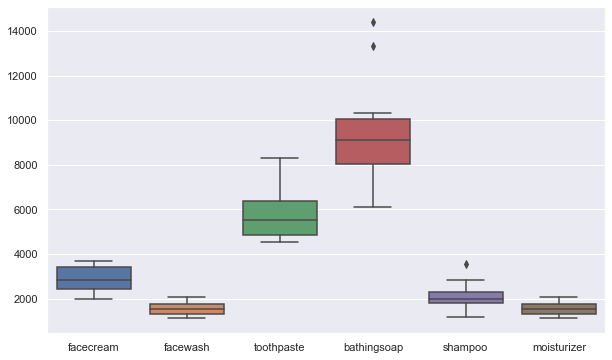

In [6]:
ventas=df.drop(['month_number','total_units','total_profit'], axis = 1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=ventas)
plt.show()

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

In [7]:
p_df = ndf.groupby('cols')
vt_df = p_df.agg({'vals':[sum]}).reset_index()
labels=[]
for i in range(len(vt_df['cols'])):
    labels.append(vt_df['cols'][i])


In [8]:
vt_df.columns

MultiIndex([('cols',    ''),
            ('vals', 'sum')],
           )

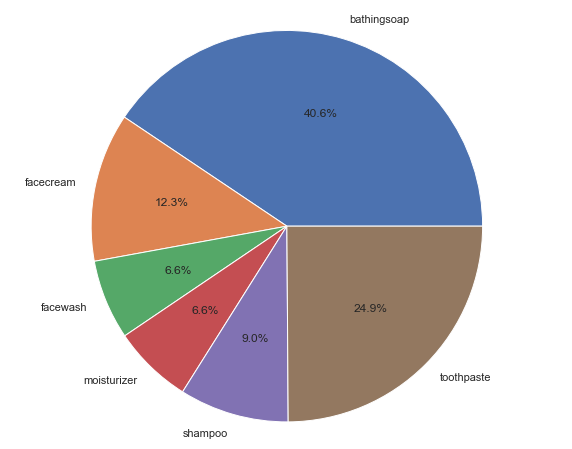

In [9]:
fig1, ax1 = plt.subplots()
ax1.pie(vt_df[('vals', 'sum')], labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()